# Лабораторная работа №1
по дисциплине «Анализ данных».

Выполнил студент группы ИВТ-б-о-21-1 Харчеко Богдан Романович.
> Задание:
*   Найти датасет.
*   Произвести выборки, определить t-критерий Стьюдента.
*   Сделать выводы.

[Ссылка на датасет](https://www.kaggle.com/datasets/codebreaker619/alcohol-comsumption-around-the-world)


In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv
import pandas as pd

%matplotlib inline

Даны две выборки: количество алкоголя, потребляемого жителями различных стран мира. В данном наборе данных учитываются только пиво и вино.

In [28]:
df = pd.read_csv('drinks.csv')

# Извлеките значения веса и роста в списки
beer = df['beer_servings'].tolist()
wine = df['wine_servings'].tolist()

Сформулируем нулевую и альтернативную гипотезы:
* $H_0: В среднем пиво пьют чаще, чем вино
* $H_1: В среднем вино пьют чаще, чем пиво

Построим графики распределения частот для обеих выборок.

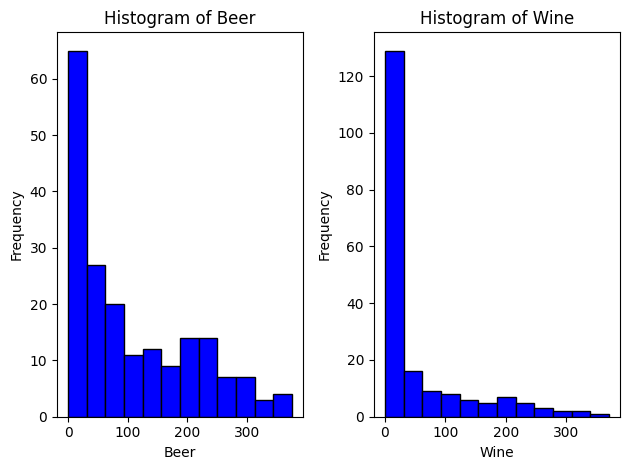

In [30]:
# Первый график
plt.subplot(1, 2, 1)
plt.hist(beer, color='blue', edgecolor='black', bins=int(100/8))
plt.xlabel('Beer')
plt.ylabel('Frequency')
plt.title('Histogram of Beer')

# Второй график
plt.subplot(1, 2, 2)
plt.hist(wine, color='blue', edgecolor='black', bins=int(100/8))
plt.xlabel('Wine')
plt.ylabel('Frequency')
plt.title('Histogram of Wine')

# Отображение графиков
plt.tight_layout()
plt.show()

Так как распределение частот близко к нормальному, мы можем использовать t-критерий Стьюдента.

In [32]:
average_beer = np.mean(beer)
average_wine = np.mean(wine)

# Вывод средних значений
print("В среднем пьют пиво:", average_beer)
print("В среднем пьют вин:", (average_wine))

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(beer, wine)

# Вывод результатов
print(p_value)
if p_value < 0.05:
    print("В среднем пиво пьют чаще")
else:
    print("В среднем вино пьют чаще")

В среднем пьют пиво: 106.16062176165804
В среднем пьют вин: 49.45077720207254
2.3346193715127866e-09
В среднем пиво пьют чаще


P > 0.05, поэтому можем принять альтернативную гипотезу $Н_0$ о различиях

### ANOVA
Построим блочную диаграмму:

Text(0, 0.5, 'На человека')

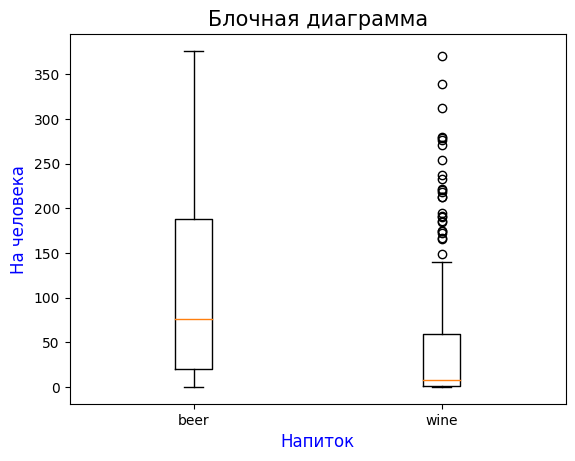

In [50]:
alcohol = [beer, wine]

plt.boxplot(alcohol, labels=["beer", "wine"])
plt.title("Блочная диаграмма", fontsize=15)
plt.xlabel("Напиток", fontsize=12, color="blue")
plt.ylabel("На человека", fontsize=12, color="blue")



Выполним однофакторный дисперсионный анализ:

In [34]:
from scipy.stats import f_oneway

f_oneway(beer, wine)

F_onewayResult(statistic=37.43233230581769, pvalue=2.3346193715129942e-09)

P > 0.05, поэтому прринимаем нулевую гипотезу.